In [1]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [2]:
!apt-get install openjdk-11-jdk-headless -qq> /dev/null

In [3]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [4]:
!pip install -q findspark

In [5]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 8.3 MB/s eta 0:00:00


In [6]:
!pip install --no-deps spark-df-profiling-new

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark-df-profiling-new: filename=spark_df_profiling_new-1.1.14-py3-none-any.whl size=92076 sha256=ed28243f26bb6c3649a80334cb91ce97d9d9f7f8877601a8021078cd992fcfea
  Stored in directory: /root/.cache/pip/wheels/ff/bf/de/f525f8bee6fc166a4216204bcf64477c8f152a380dfa8b5cd0
Successfully built spark-df-profiling-new


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [8]:
# set spark folder to the system path env
import os
os.environ["JAVA_home"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [10]:
import databricks.koalas as ks
# set koalas
ks.set_option('compute.ops_on_diff_frames', True)

### Read dataset from Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [12]:
mkdir data

In [13]:
cp /content/gdrive/MyDrive/'Colab Notebooks'/dataBDF2/data.zip /content/data/data.zip

In [14]:
!unzip data/data.zip -d data

Archive:  data/data.zip
  inflating: data/credits.csv        
  inflating: data/keywords.csv       
  inflating: data/links_small.csv    
  inflating: data/movies_metadata.csv  
  inflating: data/ratings_small.csv  


In [15]:
from IPython.utils import encoding
from IPython.utils.py3compat import encode
# read files
df_credits = spark.read.options(quote="\"", escape="\"",multiline=True).csv('data/credits.csv', inferSchema=True, header=True).distinct()
df_keywords = spark.read.options(quote="\"", escape="\"",multiline=True).csv('data/keywords.csv', inferSchema=True, header=True).distinct()
df_links = spark.read.options(quote="\"", escape="\"",multiline=True).csv('data/links_small.csv', inferSchema=True, header=True).distinct()
df_movies_metadata = spark.read.options(quote="\"", escape="\"",multiline=True).csv('data/movies_metadata.csv', inferSchema=True, header=True).distinct()
df_ratings_small = spark.read.options(quote="\"", escape="\"",multiline=True).csv('data/ratings_small.csv', inferSchema=True, header=True).distinct()

In [16]:
df_movies_metadata = df_movies_metadata.na.drop(subset=["vote_average"]) #Remove a few wrong data rows

### Raw Data Exploration

Duplicates have been cleared before exploring the data with spark_df_profiling package. 


In [17]:
import spark_df_profiling

In [18]:
mkdir profiles

Create profiles that delivers many informations over each features included in a dataset such as distinct count, mean, median and other stats. 
Example with the feature 'vote_average' :

<img src="profile_example/vote_average_profile_example.png" width="500">

In [19]:
# Datasets profiling for quick overview in HTML format
# Commented to avoid creating again
"""
profile = spark_df_profiling.ProfileReport(df_credits)
profile.to_file(outputfile="/content/profiles/credits_profile.html")"""

'\nprofile = spark_df_profiling.ProfileReport(df_credits)\nprofile.to_file(outputfile="/content/profiles/credits_profile.html")'

In [20]:
"""profile = spark_df_profiling.ProfileReport(df_keywords)
profile.to_file(outputfile="/content/profiles/keywords_profile.html")"""

'profile = spark_df_profiling.ProfileReport(df_keywords)\nprofile.to_file(outputfile="/content/profiles/keywords_profile.html")'

In [21]:
"""profile = spark_df_profiling.ProfileReport(df_links)
profile.to_file(outputfile="/content/profiles/links_profile.html")"""

'profile = spark_df_profiling.ProfileReport(df_links)\nprofile.to_file(outputfile="/content/profiles/links_profile.html")'

In [22]:
"""profile = spark_df_profiling.ProfileReport(df_movies_metadata)
profile.to_file(outputfile="/content/profiles/movies_metadata_profile.html")"""

'profile = spark_df_profiling.ProfileReport(df_movies_metadata)\nprofile.to_file(outputfile="/content/profiles/movies_metadata_profile.html")'

In [23]:
"""profile = spark_df_profiling.ProfileReport(df_ratings_small)
profile.to_file(outputfile="/content/profiles/ratings_profile.html")"""

'profile = spark_df_profiling.ProfileReport(df_ratings_small)\nprofile.to_file(outputfile="/content/profiles/ratings_profile.html")'

In [24]:
movies = df_movies_metadata.to_koalas()

Some informations didn't properly show up on the profiles such as "budget" column being wrongly displayed as a categorical feature.

In [25]:
movies.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45442
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45443 non-null  object 
 1   belongs_to_collection  4489 non-null   object 
 2   budget                 45443 non-null  object 
 3   genres                 45443 non-null  object 
 4   homepage               7776 non-null   object 
 5   id                     45443 non-null  object 
 6   imdb_id                45426 non-null  object 
 7   original_language      45432 non-null  object 
 8   original_title         45443 non-null  object 
 9   overview               44489 non-null  object 
 10  popularity             45443 non-null  object 
 11  poster_path            45060 non-null  object 
 12  production_companies   45443 non-null  object 
 13  production_countries   45443 non-null  object 
 14  release_date           45359 non-null  object 
 

Dtype "object" columns may contain multiple types. Otherwise, the type can just be changed to the correct one.

Example with "budget" column:

In [26]:
# Seeking for budget over 300M$ to check max budget value
movies[movies['budget']>300000000]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
18924,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1045713802,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068


In [27]:
# numerical features info :
df_movies_metadata.withColumn("budget", df_movies_metadata.budget.cast('int')).to_koalas().describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.544300e+04,4.544300e+04,45186.000000,45443.000000,45443.000000
mean,4.226417e+06,1.121350e+07,94.126234,5.618311,109.922210
std,1.742775e+07,6.434392e+07,38.412464,1.924092,491.398368
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


### Recreate a know popularity calculation and compare it to the feature 'popularity' of the movies_metadata

In [45]:
# Get the 95th percentile of vote count to consider only the most seen movies. According to the profiles it is 434 votes
from pyspark.sql.functions import col

n = df_movies_metadata.approxQuantile("vote_count", [0.95], 0) # verification
print(n)
q95_movies = df_movies_metadata.filter(col("vote_count") >= n[0])

[434.0]


In [48]:
# Define the weighted_rating function based on the IMDB formula
# C = mean vote_average (5.62 according to the profile)
C= 5.62
def weighted_rating(v, R, n=n[0], C=C):
    return (v/(v+n) * R) + (n/(n+v) * C)

# adding a score column
q95_movies = q95_movies.withColumn("score", weighted_rating(col("vote_count"), col("vote_average")))

In [90]:
# Display the top 10 movies according to score
from pyspark.sql.functions import round
q_movies = q95_movies.sort(col("score").desc())
q_movies.select("title", "vote_count", "vote_average", round(col("score"),2).alias('score')).show(10, truncate=False)

+------------------------+----------+------------+-----+
|title                   |vote_count|vote_average|score|
+------------------------+----------+------------+-----+
|The Shawshank Redemption|8358      |8.5         |8.36 |
|The Godfather           |6024      |8.5         |8.31 |
|The Dark Knight         |12269     |8.3         |8.21 |
|Fight Club              |9678      |8.3         |8.18 |
|Pulp Fiction            |8670      |8.3         |8.17 |
|Forrest Gump            |8147      |8.2         |8.07 |
|Schindler's List        |4436      |8.3         |8.06 |
|Whiplash                |4376      |8.3         |8.06 |
|Spirited Away           |3968      |8.3         |8.04 |
|The Empire Strikes Back |5998      |8.2         |8.03 |
+------------------------+----------+------------+-----+
only showing top 10 rows



Compare to the 'popularity' feature given in the dataset (yet the calcul is not explained)

In [76]:
import matplotlib.pyplot as plt
df_pop_num = df_movies_metadata.withColumn('popularity', df_movies_metadata.popularity.cast('float'))
sorted_df = df_pop_num.sort(col("popularity").desc())
top_10_movies = sorted_df.select("title", "popularity").limit(10)

In [77]:
# Get a list of tuples for titles and popularity values
top_10_movies_list = top_10_movies.rdd.map(lambda x: (x[0], x[1])).collect()

titles = [x[0] for x in top_10_movies_list]
popularity = [x[1] for x in top_10_movies_list]

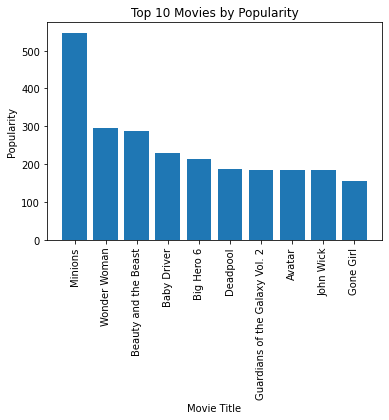

In [78]:
# Create a bar chart
%matplotlib inline
plt.bar(titles, popularity)
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.title("Top 10 Movies by Popularity")
plt.xticks(rotation=90)
plt.show()

Now within the 95th percentile of vote count

In [87]:
top_10_movies_q95 = q95_movies.withColumn('popularity', q95_movies.popularity.cast('float')).sort(col("popularity").desc()).select("title", "popularity").limit(10)
top_10_movies_q95_list = top_10_movies_q95.rdd.map(lambda x: (x[0], x[1])).collect()
titles_q95 = [x[0] for x in top_10_movies_q95_list]
popularity_q95 = [x[1] for x in top_10_movies_q95_list]

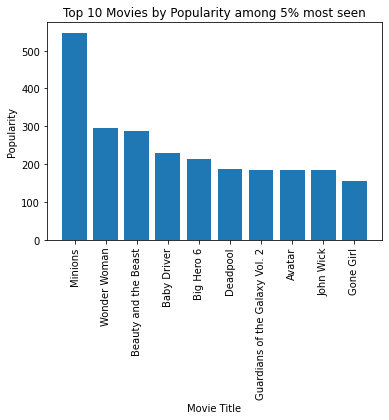

In [88]:
%matplotlib inline
plt.bar(titles_q95, popularity_q95)
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.title("Top 10 Movies by Popularity among 5% most seen")
plt.xticks(rotation=90)
plt.show()

Result is that 'popularity' metric is not calculated on the same base as IMDB popularity score.